In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

#### Load data

In [2]:
from ucimlrepo import fetch_ucirepo 

breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17) 
  
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

mapping = {'M': 0, 'B': 1}
y = y['Diagnosis'].map(mapping)

#### Visualizations

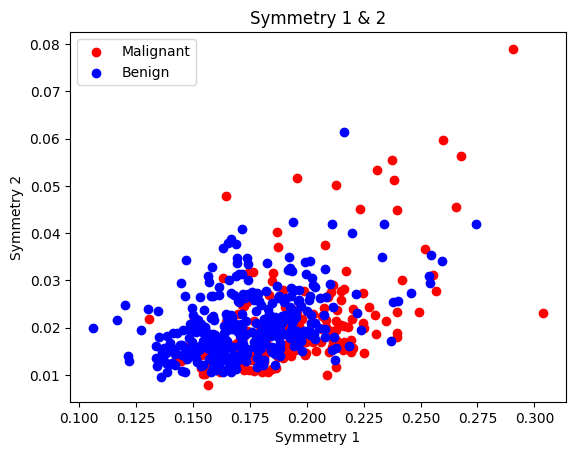

In [3]:
plt.scatter(X[y == 0]['symmetry1'], X[y == 0]['symmetry2'], c='red', label='Malignant')
plt.scatter(X[y == 1]['symmetry1'], X[y == 1]['symmetry2'], c='blue', label='Benign')
plt.xlabel('Symmetry 1')
plt.ylabel('Symmetry 2')
plt.title('Symmetry 1 & 2')
plt.legend()
plt.show()

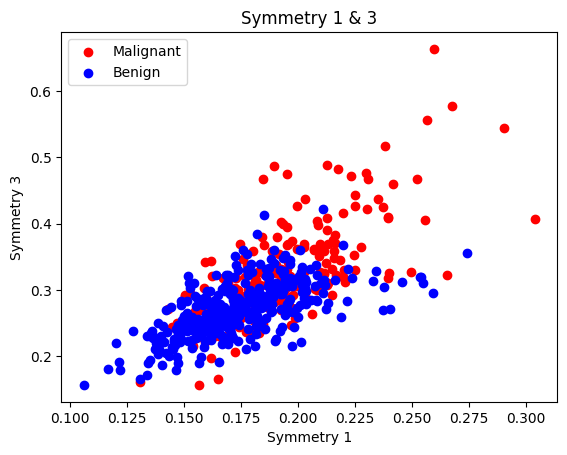

In [4]:
plt.scatter(X[y == 0]['symmetry1'], X[y == 0]['symmetry3'], c='red', label='Malignant')
plt.scatter(X[y == 1]['symmetry1'], X[y == 1]['symmetry3'], c='blue', label='Benign')
plt.xlabel('Symmetry 1')
plt.ylabel('Symmetry 3')
plt.title('Symmetry 1 & 3')
plt.legend()
plt.show()

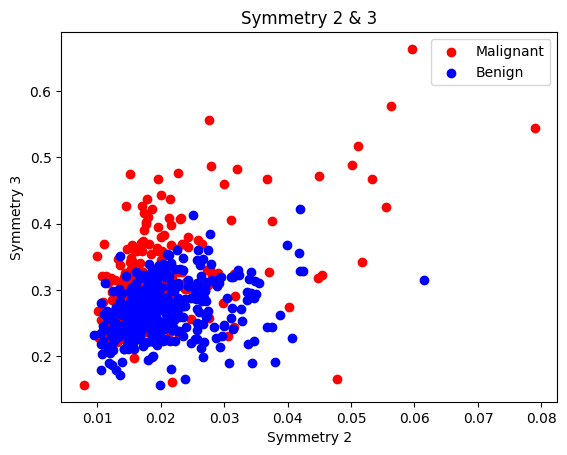

In [5]:
plt.scatter(X[y == 0]['symmetry2'], X[y == 0]['symmetry3'], c='red', label='Malignant')
plt.scatter(X[y == 1]['symmetry2'], X[y == 1]['symmetry3'], c='blue', label='Benign')
plt.xlabel('Symmetry 2')
plt.ylabel('Symmetry 3')
plt.title('Symmetry 2 & 3')
plt.legend()
plt.show()

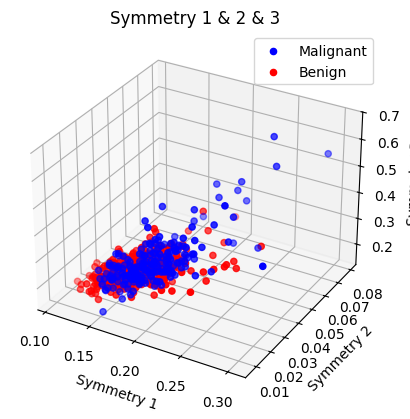

In [6]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[y == 0]['symmetry1'], X[y == 0]['symmetry2'], X[y == 0]['symmetry3'], c='blue', label='Malignant')
ax.scatter(X[y == 1]['symmetry1'], X[y == 1]['symmetry2'], X[y == 1]['symmetry3'], c='red', label='Benign')

ax.set_xlabel('Symmetry 1')
ax.set_ylabel('Symmetry 2')
ax.set_zlabel('Symmetry 3')
ax.set_title('Symmetry 1 & 2 & 3')
ax.legend()
plt.show()

#### Data clean

In [7]:
X = X[['symmetry1', 'symmetry2', 'symmetry3']].apply(pd.to_numeric, errors='coerce')

print("Znaleziono NaN w X? ", X.isna().any().any())    
print("Znaleziono NaN w y? ", y.isna().any().any())

X = X.values
y = y.values

Znaleziono NaN w X?  False
Znaleziono NaN w y?  False


#### Data scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X = scaler.fit_transform(X)

#### KNN Algorithm

In [9]:
from collections import Counter

class KNN:
    def __init__(self, k, X_train, y_train):
        self.k = k
        self.X_train = X_train
        self.y_train = y_train
        
    def predict(self, X):
        return np.array([self._predict(x) for x in X])
    
    def _predict(self, x):
        distances = [np.linalg.norm(x_train - x) for x_train in self.X_train]        
        k_indices = np.argsort(distances)[:self.k]
        k_nearest = [self.y_train[i] for i in k_indices]
        most_common = Counter(k_nearest).most_common(1)
        return most_common[0][0]

#### Training model

In [10]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

k_values = np.linspace(1, 50, num=50, dtype=int)
accuracy_values = np.empty(shape=(len(k_values), ))

for i, k in enumerate(k_values):
    accuracy_values[i] = np.mean(KNN(k, X_train, y_train).predict(X_test) == y_test)

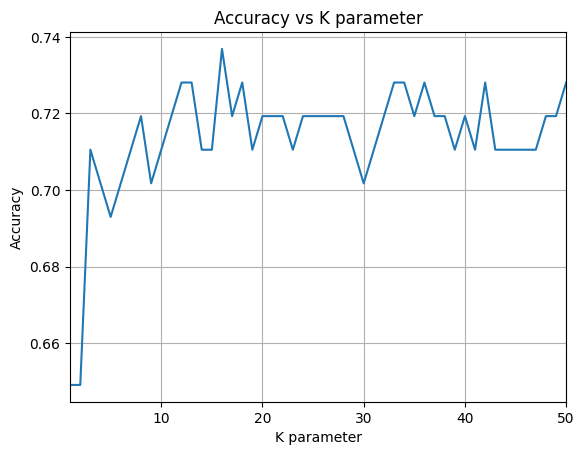

In [11]:
plt.plot(k_values, accuracy_values)
plt.xlabel("K parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy vs K parameter")
plt.grid(True)
plt.xlim([1, 50])
plt.show()

In [12]:
df = pd.DataFrame({'k': k_values, 'accuracy': accuracy_values})
df

,k,accuracy
0,1,0.649123
1,2,0.649123
2,3,0.710526
3,4,0.701754
4,5,0.692982
5,6,0.701754
6,7,0.710526
7,8,0.719298
8,9,0.701754
9,10,0.710526


#### Scikit-learn implementation

In [13]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

k_values = np.linspace(1, 50, num=50, dtype=int)
accuracy_values_uniform = np.empty(shape=(len(k_values), ))
accuracy_values_distance = np.empty(shape=(len(k_values), ))

for i, k in enumerate(k_values):
    accuracy_values_uniform[i] = accuracy_score(KNeighborsClassifier(n_neighbors=k, weights='uniform').fit(X_train, y_train).predict(X_test), y_test)
    accuracy_values_distance[i] = accuracy_score(KNeighborsClassifier(n_neighbors=k, weights='distance').fit(X_train, y_train).predict(X_test), y_test)

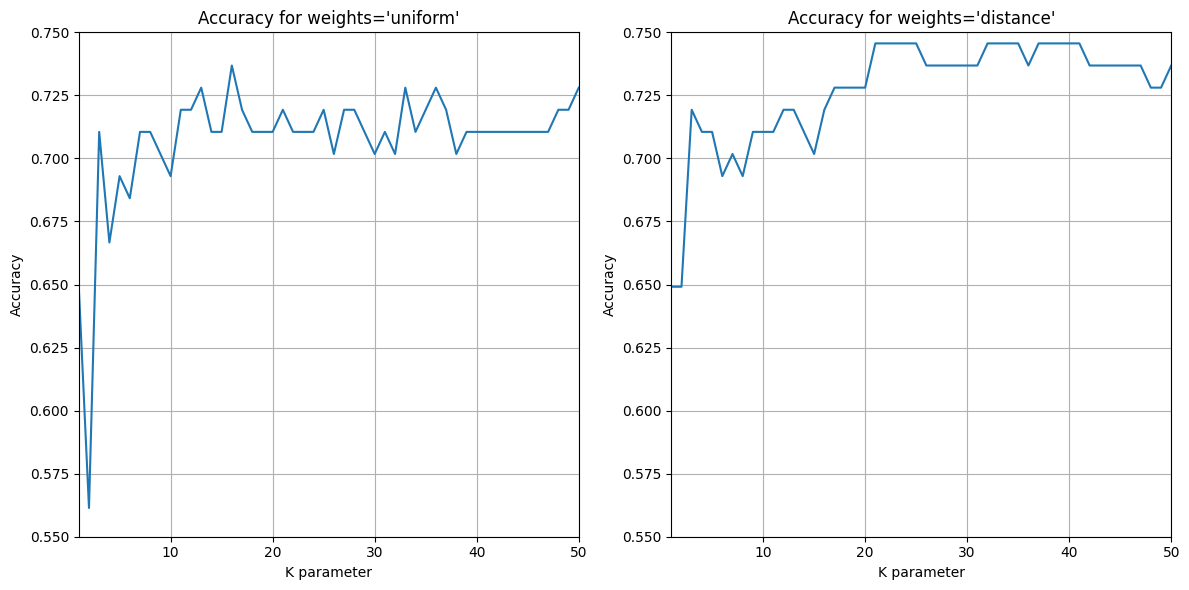

In [14]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(k_values, accuracy_values_uniform)
plt.xlim([1, 50])
plt.ylim([0.55, 0.75])
plt.xlabel("K parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy for weights='uniform'")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(k_values, accuracy_values_distance)
plt.xlim([1, 50])
plt.ylim([0.55, 0.75])
plt.xlabel("K parameter")
plt.ylabel("Accuracy")
plt.title("Accuracy for weights='distance'")
plt.grid(True)


plt.tight_layout()
plt.show()

#### Time comparison

In [15]:
%timeit KNN(k=5, X_train=X_train, y_train=y_train).predict(X_test)

%timeit KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train).predict(X_test)

98.3 ms ± 1.3 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
3.33 ms ± 62.2 μs per loop (mean ± std. dev. of 7 runs, 100 loops each)


#### ROC and AUC

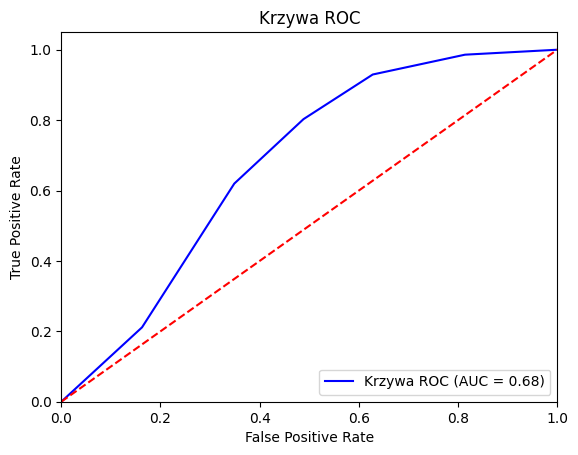

In [16]:
from sklearn.metrics import roc_curve, auc

knn = KNeighborsClassifier(n_neighbors=5).fit(X_train, y_train)
y_prob = knn.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='blue', label='Krzywa ROC (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Krzywa ROC')
plt.legend(loc="lower right")
plt.show()